In [29]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib import pyplot as plt

In [138]:
from datetime import datetime
symbols = ["MSFT", "AMZN","GOOG", "FB", "AAPL"]
start_date = "2013-01-01"
end_date = "2019-07-01"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [139]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,GOOG,FB,AAPL
Date,,,,,
2012-12-31,22.475725,250.869995,352.369232,26.620001,16.569740
2013-01-02,23.241472,257.309998,360.274597,28.000000,17.094694
2013-01-03,22.930120,258.480011,360.483826,27.770000,16.878920
2013-01-04,22.500971,259.149994,367.607117,28.760000,16.408764
2013-01-07,22.458902,268.459991,366.003143,29.420000,16.312239
...,...,...,...,...,...
2019-06-25,131.490189,1878.270020,1086.349976,188.839996,48.228920
2019-06-26,131.982925,1897.829956,1079.800049,187.660004,49.272068
2019-06-27,132.199722,1904.280029,1076.010010,189.500000,49.257271


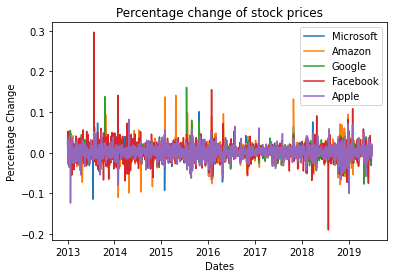

In [140]:
plt.plot(stock_data['Adj Close'].pct_change())
plt.xlabel("Dates")
plt.ylabel("Percentage Change")
plt.title("Percentage change of stock prices")
plt.legend(['Microsoft', 'Amazon', 'Google', 'Facebook', 'Apple'])
plt.show()

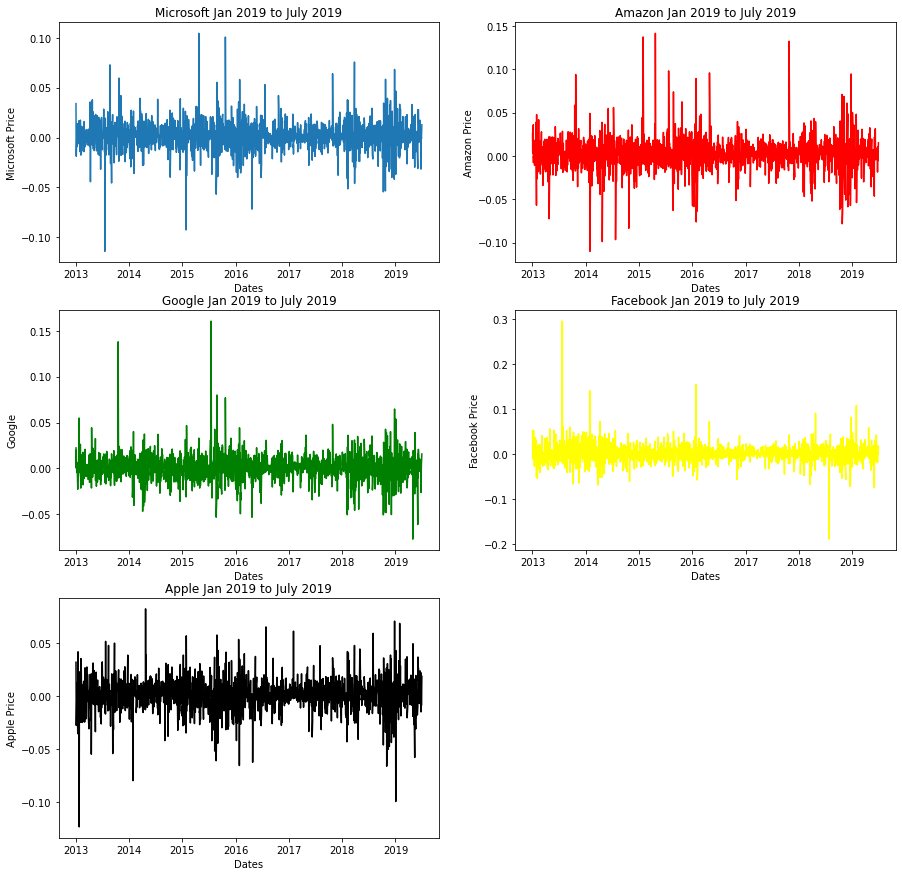

In [141]:
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax1.set_xlabel('Dates')
ax1.set_ylabel('Microsoft Price')
ax1.set_title('Microsoft Jan 2019 to July 2019')
ax2.plot(stock_data['Adj Close']['AMZN'].pct_change(), color = 'Red')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Amazon Price')
ax2.set_title('Amazon Jan 2019 to July 2019')

ax3.plot(stock_data['Adj Close']['GOOG'].pct_change(), color = 'Green')
ax3.set_xlabel('Dates')
ax3.set_ylabel('Google')
ax3.set_title('Google Jan 2019 to July 2019')

ax4.plot(stock_data['Adj Close']['FB'].pct_change(), color = 'Yellow')
ax4.set_xlabel('Dates')
ax4.set_ylabel('Facebook Price')
ax4.set_title('Facebook Jan 2019 to July 2019')

ax5.plot(stock_data['Adj Close']['AAPL'].pct_change(), color = 'Black')
ax5.set_xlabel('Dates')
ax5.set_ylabel('Apple Price')
ax5.set_title('Apple Jan 2019 to July 2019')


plt.show()


In [142]:
daily_price_mean = stock_data['Adj Close'].pct_change().mean()

print(daily_price_mean)

Symbols
MSFT    0.001199
AMZN    0.001425
GOOG    0.000803
FB      0.001427
AAPL    0.000798
dtype: float64


In [143]:
#daily mean index for x axis 
daily_price_mean.keys()

Index(['MSFT', 'AMZN', 'GOOG', 'FB', 'AAPL'], dtype='object', name='Symbols')

In [144]:
# mean height for y axis 
height = []

for key in daily_price_mean.keys():
    height.append(daily_price_mean[key])
height

[0.0011992283950817278,
 0.0014247111233025892,
 0.0008025389451452983,
 0.00142697043458371,
 0.0007979003360956467]

In [145]:
#x axis 
x_axis = np.arange(len(daily_price_mean.keys()))

x_axis

array([0, 1, 2, 3, 4])

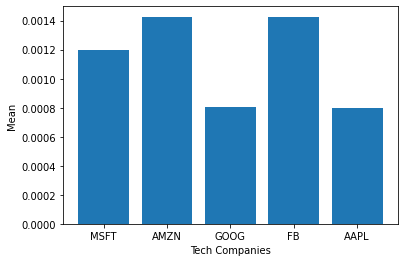

In [146]:
plt.bar(x_axis, height)
plt.xticks(x_axis, daily_price_mean.keys())
plt.xlabel('Tech Companies')
plt.ylabel('Mean')
plt.show()

In [147]:
daily_var = stock_data['Adj Close'].pct_change().var()

print(daily_var)

Symbols
MSFT    0.000216
AMZN    0.000359
GOOG    0.000217
FB      0.000437
AAPL    0.000251
dtype: float64


In [148]:
daily_var.keys()

Index(['MSFT', 'AMZN', 'GOOG', 'FB', 'AAPL'], dtype='object', name='Symbols')

In [149]:
# mean height for y axis 
height = []

for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.00021623177063041966,
 0.00035903565193778214,
 0.00021676430585219067,
 0.0004374058540371502,
 0.000250568413223598]

In [150]:
#x axis 
x_axis = np.arange(len(daily_var.keys()))

x_axis

array([0, 1, 2, 3, 4])

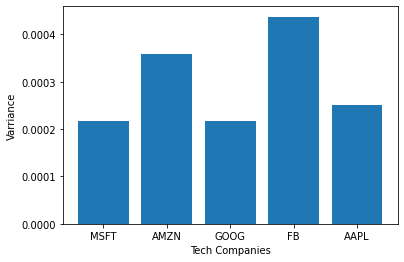

In [151]:
plt.bar(x_axis, height)
plt.xticks(x_axis, daily_var.keys())
plt.xlabel('Tech Companies')
plt.ylabel('Varriance')
plt.show()

In [152]:
stock_data['Adj Close'].pct_change().corr()

Symbols,MSFT,AMZN,GOOG,FB,AAPL
Symbols,,,,,
MSFT,1.000000,0.501031,0.573772,0.367961,0.446728
AMZN,0.501031,1.000000,0.596393,0.472491,0.370495
GOOG,0.573772,0.596393,1.000000,0.496993,0.419204
FB,0.367961,0.472491,0.496993,1.000000,0.334367
AAPL,0.446728,0.370495,0.419204,0.334367,1.000000
